In [1]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [3]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
print(knr.predict([[50]]))

[1033.33333333]


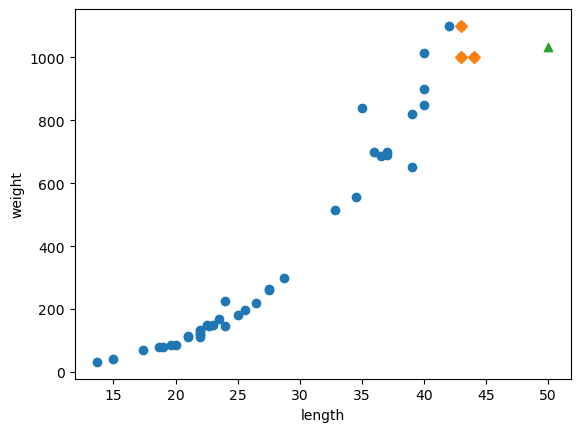

In [7]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
print(knr.predict([[100]]))

[1033.33333333]


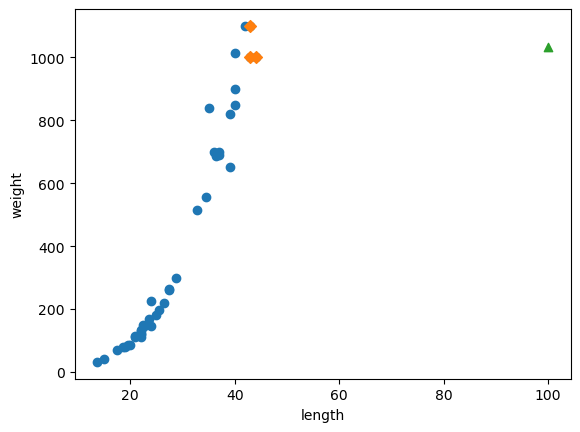

In [10]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**기존의 머신러닝 문제점**
농어가 아무리 커져도 무게가 더 늘어나지 않는다. 

해결하려면
- k-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포함되도록 훈련 세트를 다시 만들어야 한다.
- 다른 알고리즘을 적용한다.

### 선형 회귀
- 선을 학습하는 알고리즘
- 특성이 하나인 경우 직선을 학습하는 알고리즘
- 비교적 간단하고 성능이 뛰어남
- 대표적인 회귀 알고리즘

사이킷런 - sklearn.linear_model 패키지 아래에 선형 회귀 알고리즘을 구현해놓았다.
- LinearRegression 클래스
    - fit(), score(), predict()

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [12]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


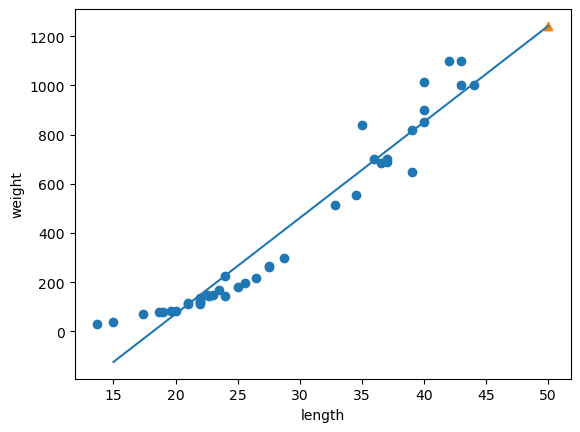

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


산점도를 보면 일직선이라기보다는 구부러진 곡선에 가깝다.
최적의 곡선을 찾아야 한다. -> **다항 회귀**

### 다항 회귀(polynomial regression)
y=ax^2+bx+c

길이^2와 길이를 붙인다. 

In [15]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [16]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [17]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [18]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [19]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


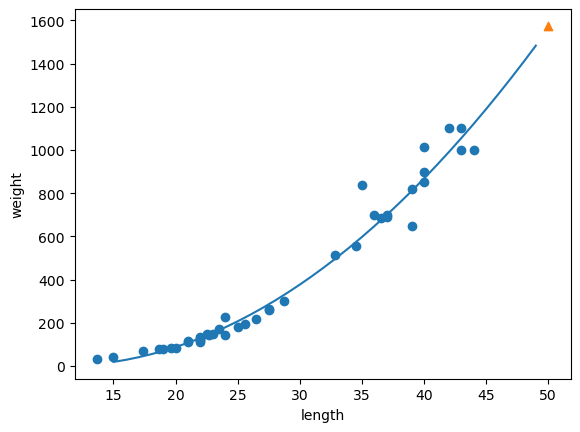

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15,50)

plt.scatter(train_input, train_target)

#짧은 직선을 반복해서 그린다. 이를 통해 곡선을 만든다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


### 기존의 머신 러닝

- 다항회귀로 농어의 무게를 어느정도 예측 가능
- 과소적합이 여전히 남아있다.
    - 훈련 세트보다 테스트 세트의 점수가 높다.
- 선형 회귀는 특성이 많을수록 효과적이다.
    - 제곱보다 더 고차항을 넣어야 한다.
   
### 다중 회귀(multiple regression)
여러 개의 특성을 사용한 선형 회귀
3차원 공간 이상은 그리거나 상상할 수 없다

**특성 공학(feature engineering)**
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
    - 농어의 길이 뿐만 아니라 높이, 두께도 함께 사용
    - 3개의 특성을 각각 제곱하여 추가
    - 각 특성을 곱해서 또 다른 특성을 만듦.
- 데이터 준비
    - 특성이 3개 -> 데이터 복붙 번거롭기 때문에
    - 판다스(pandas) 사용
        - 데이터 분석 라이브러리
        - 핵심 데이터 구조는 데이터프레임(dataframe)
        - numpy 배열과 비슷하게 다차원 배열을 다룰 수 있다.
        - csv 파일로 판다스 dataframe을 만듦.

In [30]:
import pandas as pd
df = pd.read_csv("perch_csv_data.csv")

perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [31]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [32]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

### 변환기(transformer)
- 특성을 만들거나 전처리하기 위한 사이킷런이 제공하는 다양한 클래스
- PolynomialFeatrues 클래스
    - 여기에서 사용할 변환기
    - sklearn.preproccessing 패키지에 포함돼 있음
    - 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가
    
- fit() 메서드
    - 새롭게 만들 특성 조합을 찾음.
    - 변환기는 입력 데이터를 변환하는데 target 데이터가 필요하지 않다.
    - 모델 클래스와는 다르게 fit() 메서드에 입력 데이터만 전달한다.
- transform() 메서드
    - 실제로 데이터를 변환한다.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [38]:
print(train_poly.shape)

(42, 9)


In [39]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [40]:
test_poly = poly.transform(test_input)

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [42]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [43]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [44]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [45]:
lr.fit(train_poly, train_target)

LinearRegression()

In [46]:
print(lr.score(train_poly, train_target))

0.9999999999938143


In [47]:
print(lr.score(test_poly, test_target))

-144.40744532797535


테스트 세트에 대해서 형편없는 점수를 받음. 
훈련 세트에 대한 너무 과대적합. 다시 특성을 줄임으로써 과대적합을 줄여야 한다.

### 규제(regularization)
- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 제한하는 것.
- 모델이 훈련 세트에 과대적합 되지 않도록 만드는 것
- 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일

**스케일 정규화**
- 데이터 그대로 사용
  - 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다.
  - 특성의 스케일이 정규화되지 않으면 곱해지는 계수 값도 차이 나게 된다.
- 스케일 정규화
  - 앞에서 평균과 표준편차를 직접 구해 특성을 표준점수로 나눈다.
  - 사이킷런에서 제공한는 변환기인 StandardScaler 클래스를 사용한다. 

In [48]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [50]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [51]:
print(train_poly.shape)

(42, 55)


In [52]:
print(test_poly.shape)

(14, 55)


### 릿지와 라쏘 모델
- 사이킷런에 제공하는 선형 회귀 모델에 규제를 추가한 모델
- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있다.
- sklearn.linear_model 패키지 안
- **ridge model**
  - 계수를 제곱한 값을 기준으로 규제를 적용
  - **alpha 매개변수**
    - 규제의 양을 임의로 조절 가능
    - 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절
    - 값이 크면 규제 강도가 강해진다. alpha 매개변수 값이 크면 규제 강도가 강해짐으로써 계수 값을 더 줄이고 더 과소적합 되도록 유도한다.
    - 값이 작으면 규제 강도가 약해진다. 계수를 줄이는 역할이 줄어들어 선형 회귀 모델과 유사해지므로 과대적합이 될 가능성이 있다. 
  - 적절한 alpha 매개변수 값 찾기
    - alpha 값에 대한 결정계수(R의 제곱)값의 그래프를 그려 본다.
    - 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 매개변수 값
    - alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장해 본다. 
- **lasso model**
  - 계수의 절댓값을 기준으로 규제를 적용
  


In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [54]:
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [55]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


In [57]:
# 뭔가 이거 나올 듯
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

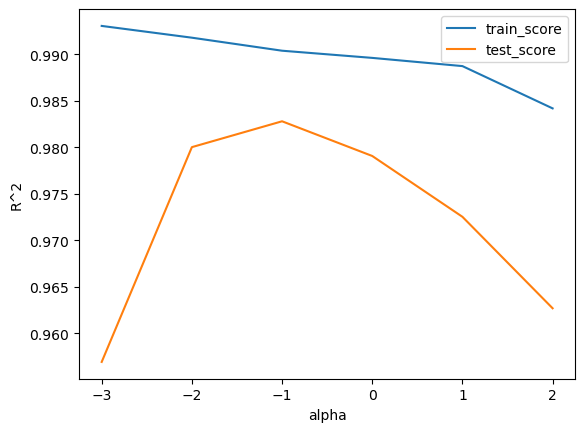

In [59]:
# alpha에 대한 결정계수의 그래프를 그릴 때, alpha 값이 0.001에서 100까지 10배씩 늘렸기 때문에
# 그래프를 그리면 그래프 왼쪽이 너무 촘촘해진다. 따라서 로그함수로 바꾸어서 지수로 표현한다. 0.001 > -3 / 100 > 2

import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_score', 'test_score'])
plt.show()

그래프 왼쪽
- 훈련 세트와 테스트 세트 간의 점수 차이가 아주 크다. 
- 과대적합의 전형적인 모습

그래프 오른쪽
- 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수가 모두 낮아진다.
- 과소적합으로 가는 모습
- 적절한 alpha는 두 그래프 간의 간격 차이가 가장 작은 -1 > alpha = 0.1

In [60]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [61]:
print(ridge.score(train_scaled, train_target))

0.9903815817570368


In [62]:
print(ridge.score(test_scaled, test_target))

0.9827976465386896


### 라쏘 회귀(lasso regression)
- 계수의 절댓값을 기준으로 규제를 적용

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [64]:
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [66]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [68]:
train_score =[]
test_score = []
alpah_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

# lasso 모델을 훈련할 때 Warning이 발생할 수 있다.
# 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 경고가 발생한다.
# 반복 횟수를 충분히 늘리기 위해 max_iter 매개변수 값을 10000으로 지정한다.

C:\Users\82104\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\82104\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


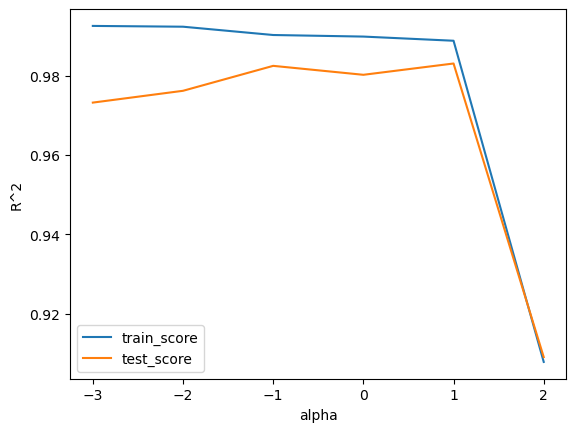

In [69]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_score', 'test_score'])
plt.show()

In [70]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [71]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘 모델은 계수 값을 아예 0으로 만들 수 있다.<br>
라쏘 모델의 계수는 coef_ 속성에 저장되어 있음.<br>
0인 계수 수 확인<br>
넘파이의 sum() 함수
- 넘파이 배열에 비교 연산자를 사용했을 때, 각 원소는 true 또는 false
- 비교 연산자에 맞는 원소 개수를 헤아리는 효과 

In [72]:
print(np.sum(lasso.coef_==0))

40
